<a href="https://colab.research.google.com/github/ML-coursework/MSc-Dissertation-Notebooks/blob/main/UK_bathymetric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>United Kingdom and Ireland Bathymetric data cleaning</u>

In [ ]:
# Importing Python packages and modules
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

## Uploading and visulising the geotif
#### Bathymetric data from [European Marine Observation and Data Network (EMODnet)](https://emodnet.ec.europa.eu/geoviewer/#)

CRS: EPSG:4326
Bounds: BoundingBox(left=-11.2, bottom=49.53749833333333, right=2.9000000000000004, top=61.520831666666666)
Width, Height: 3384 2876
Number of bands: 1


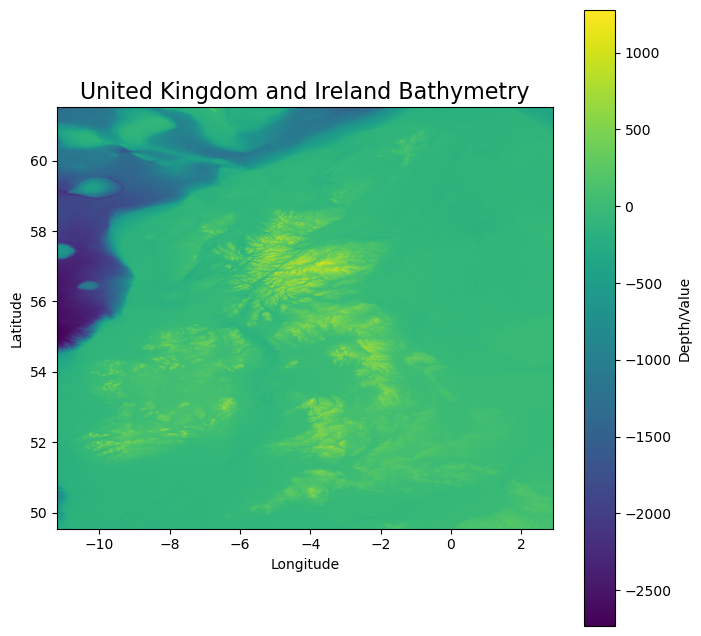

In [ ]:
#Avoiding catch errors while uploading and opening the GeoTIFF file
try:
    bath = rasterio.open("uk_ireland_bath.tiff")

# Printing the metadata, CRS, bounding box, number of x/y pixels and number of data layers
    print("CRS:", bath.crs)
    print("Bounds:", bath.bounds)
    print("Width, Height:", bath.width, bath.height)
    print("Number of bands:", bath.count)

# Reading depth data into a NumPy array
    bathymetry_data = bath.read(1)
# Displying bathymetric data in colour with matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    im = ax.imshow(bathymetry_data, cmap='viridis', extent=[bath.bounds.left, bath.bounds.right, bath.bounds.bottom, bath.bounds.top])
    fig.colorbar(im, ax=ax, label='Depth/Value')
    ax.set_title("United Kingdom and Ireland Bathymetry", fontsize=16)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

#Saving and displaying the image
    plt.savefig("Data_cleaning_images/Bath_Cleaning_UK_Ireland_bathymetry.png", dpi=150, bbox_inches="tight")
    plt.show()

#Error handling
except rasterio.errors.RasterioIOError as e:
    print(f"Error opening or reading the raster file: {e}")
    print("Please ensure the file path is correct and the file is a valid TIFF raster.")

-------------

## Exploring the data

In [ ]:
# Check for any null values
print("Nodata:", bath.nodata)

Nodata: None


In [ ]:
# Looking at the maximum and minimum and unique values
print("Min value:", bathymetry_data.min())
print("Max value:", bathymetry_data.max())
print("Unique values:", np.unique(bathymetry_data))

Min value: -2732.7305
Max value: 1277.3638
Unique values: [-2732.7305 -2732.6404 -2730.3604 ...  1265.4781  1275.7139  1277.3638]


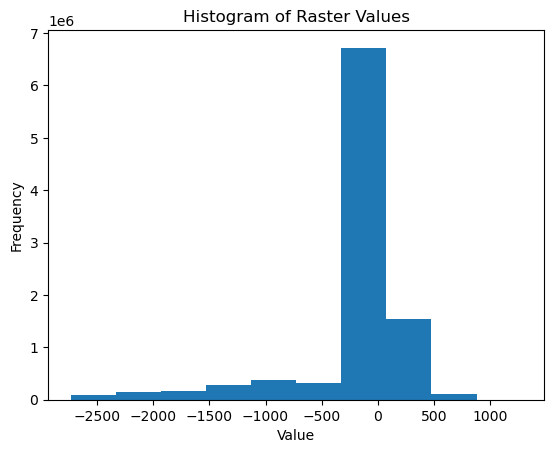

In [ ]:
plt.hist(bathymetry_data.flatten(), bins=10)
plt.title("Histogram of Raster Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.savefig("Data_cleaning_images/Bath_Cleaning_Histogram_Raster_Values.png", dpi=150, bbox_inches="tight")
plt.show()

